In [2]:
import pandas as pd
import os


# %matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
import datetime as datetime

import common_libs.data_loader as load_data

In [3]:
root_path=r'D:\PythonDev\MyQuantFinProject\Data'
#file_name='MyGlobalPort_Mar-08Jun22.csv'
file_name='THAI-y17_011222.csv'
data_file=os.path.join(root_path,file_name)

today=datetime.datetime.today()

from_month_str='2020-01-01'
to_month_str= today.strftime("%Y-%m-%d")

print(from_month_str)
print(to_month_str)

2020-01-01
2022-12-03


In [26]:
df,list_symbol=load_data.load_offline_data(from_month_str,to_month_str,data_file)
print(df.info())
print(list_symbol)

Load Price Data
                symbol  price
date                         
2020-01-02  TISCOFLEXP  34.17
2020-01-03  TISCOFLEXP  34.06
2020-01-06  TISCOFLEXP  33.21
             symbol  price
date                      
2022-11-29  TDEX.BK   9.78
2022-11-30  TDEX.BK   9.83
2022-12-01  TDEX.BK   9.86
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2814 entries, 2020-01-02 to 2022-12-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   symbol  2814 non-null   object 
 1   price   2814 non-null   float64
dtypes: float64(1), object(1)
memory usage: 66.0+ KB
None
['TISCOFLEXP', 'PHATRAEQRMF', 'TSF-A', 'TDEX.BK']


D:\PythonDev\MyQuantFinProject\FinQuant\common_libs\data_loader.py:42: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df=df.loc[from_month_str:to_month_str,:]


In [27]:
df.head()

,symbol,price
date,,
2020-01-02,TISCOFLEXP,34.17
2020-01-03,TISCOFLEXP,34.06
2020-01-06,TISCOFLEXP,33.21
2020-01-07,TISCOFLEXP,33.58
2020-01-08,TISCOFLEXP,32.70


In [28]:
df.tail()

,symbol,price
date,,
2022-11-25,TDEX.BK,9.70
2022-11-28,TDEX.BK,9.72
2022-11-29,TDEX.BK,9.78
2022-11-30,TDEX.BK,9.83
2022-12-01,TDEX.BK,9.86


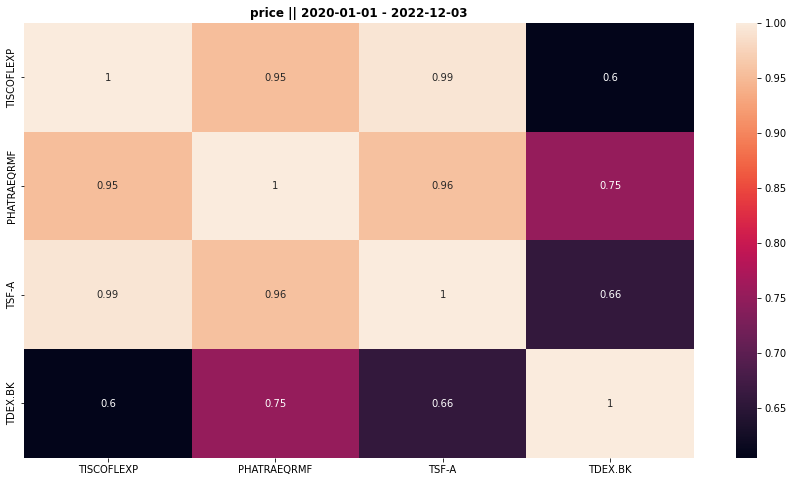

In [29]:

col_corr=['price']
col_key='symbol'

for col in col_corr:  
    pd_corr=pd.DataFrame()
    for symbol in list_symbol:

      df_by_symbol=df.query(f'{col_key}==@symbol')[[col]]
      df_by_symbol=df_by_symbol.rename(columns={col:symbol})   
      #print(df_by_symbol)  
      pd_corr=pd.concat([pd_corr, df_by_symbol], axis=1)
        
    corrMatrix = pd_corr.corr()
    plt.figure(figsize = (15,8))
    plt.title(f'{col} || {from_month_str} - {to_month_str}',fontweight ="bold")
    
    sn.heatmap(corrMatrix, annot=True)
    plt.show()
    
#     print(pd_corr)